In [1]:
from io import open
import glob
import os

In [2]:
print(glob.glob('datasets/data/names/*.txt'))

['datasets/data/names/Czech.txt', 'datasets/data/names/German.txt', 'datasets/data/names/Arabic.txt', 'datasets/data/names/Japanese.txt', 'datasets/data/names/Chinese.txt', 'datasets/data/names/Vietnamese.txt', 'datasets/data/names/Russian.txt', 'datasets/data/names/French.txt', 'datasets/data/names/Irish.txt', 'datasets/data/names/English.txt', 'datasets/data/names/Spanish.txt', 'datasets/data/names/Greek.txt', 'datasets/data/names/Italian.txt', 'datasets/data/names/Portuguese.txt', 'datasets/data/names/Scottish.txt', 'datasets/data/names/Dutch.txt', 'datasets/data/names/Korean.txt', 'datasets/data/names/Polish.txt']


In [3]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;"
n_letters = len(all_letters)

all_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'

In [4]:
n_letters

56

In [5]:
language_names = {}

all_languages = []

In [6]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [7]:
print(unicodeToAscii('Emile'))

Emile


In [8]:
def findFiles(path):
    return glob.glob(path)

In [9]:
total_names = 0

for filename in findFiles('datasets/data/names/*.txt'):

    language = os.path.splitext(os.path.basename(filename))[0]

    all_languages.append(language)

    read_names = open(filename, encoding='utf-8').read().strip().split('\n')

    names = [unicodeToAscii(line) for line in read_names]

    language_names[language] = names

    total_names += len(names)

In [10]:
all_languages

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [11]:
n_languages = len(all_languages)
n_languages

18

In [12]:
total_names

20074

In [13]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


In [14]:
import torch

In [17]:
def letterToTensor(letter):

    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1

    return tensor

In [18]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


In [19]:
print(letterToTensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.]])


In [20]:
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)

    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    
    return tensor

In [21]:
mary_tensor = nameToTensor('Mary')

mary_tensor.size()

torch.Size([4, 1, 56])

In [22]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [23]:
import torch.nn as nn

class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):

        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)

        self.i2o = nn.Linear(input_size + hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)

        hidden = self.i2h(combined)

        output = self.i2o(combined)
        output = self.softmax(output)

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [24]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_languages)

In [25]:
inp = letterToTensor('C')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp, hidden)

print('output size =', output.size())
print('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size = torch.Size([1, 256])


In [26]:
inp = nameToTensor('Charron')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp[0], hidden)

In [27]:
print(output)

tensor([[-2.8967, -2.8589, -2.9258, -2.8791, -2.9351, -2.9327, -2.8834, -2.9387,
         -2.8858, -2.8496, -2.9225, -2.8464, -2.9454, -2.8403, -2.8873, -2.8088,
         -2.8778, -2.9259]], grad_fn=<LogSoftmaxBackward0>)


In [28]:
def languageFromOutput(output):

    _, top_i = output.topk(1)

    language_i = top_i[0].item()

    return all_languages[language_i], language_i

In [29]:
print(languageFromOutput(output))

('Dutch', 15)


In [30]:
import random

def randomTrainingExample():

    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]

    random_language_names = language_names[language]

    name = random_language_names[random.randint(0, len(random_language_names) - 1)]

    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)

    return language, name, language_tensor, name_tensor

In [31]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()

    print('language =', language, ', name =', name)

language = Russian , name = Tovstykh
language = Dutch , name = Ryskamp
language = Italian , name = Benvenuti
language = Dutch , name = Peusen
language = German , name = Karl
language = Czech , name = Hnizdil
language = Russian , name = Tchanyshev
language = Polish , name = Sokolsky
language = Dutch , name = Oirschotten
language = Korean , name = Ron


In [37]:
criterion = nn.NLLLoss()
learning_rate= 0.005

In [38]:
def train(language_tensor, name_tensor):

    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, language_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [39]:
n_iters = 200000

current_loss = 0
all_losses = []

In [40]:
for epoch in range(1, n_iters + 1):

    language, name, language_tensor, name_tensor = randomTrainingExample()

    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = 'RIGHT' if guess == language else 'WRONG (%s)' % language

        print('%d %d%% %.4f %s / %s %s' % (epoch, epoch / n_iters * 100, loss, name, guess, correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

5000 2% 2.2460 Mendoza / Japanese WRONG (Spanish)
10000 5% 3.1084 Wei / Korean WRONG (German)
15000 7% 1.6489 Sullivan / Irish RIGHT
20000 10% 1.7940 Rhee / Vietnamese WRONG (Korean)
25000 12% 1.6059 Hokusai / Polish WRONG (Japanese)
30000 15% 0.0530 Chrysanthopoulos / Greek RIGHT
35000 17% 2.4888 Blumstein / Scottish WRONG (German)
40000 20% 0.4283 Sotiris / Greek RIGHT
45000 22% 0.7972 Luc / Vietnamese RIGHT
50000 25% 1.9131 Nieddu / Irish WRONG (Italian)
55000 27% 1.7794 Sung / Chinese WRONG (Korean)
60000 30% 2.6554 Baroch / Irish WRONG (Czech)
65000 32% 0.1978 Chou / Korean RIGHT
70000 35% 2.2897 Krol / Scottish WRONG (Polish)
75000 37% 0.9676 Urena / Spanish RIGHT
80000 40% 3.0690 Pyrlin / Dutch WRONG (Russian)
85000 42% 1.3397 Murray / Scottish RIGHT
90000 45% 1.8927 Schenck / Czech WRONG (Dutch)
95000 47% 1.1590 Fleischer / German RIGHT
100000 50% 2.1418 Martell / French WRONG (Spanish)
105000 52% 0.6709 Chi / Korean RIGHT
110000 55% 2.7067 Riva / Czech WRONG (Italian)
115000 5

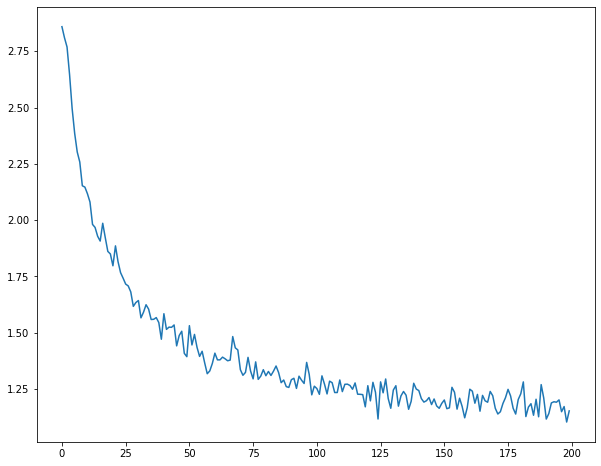

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

In [44]:
n_predictions = 3

In [55]:
input_name = 'Anish'

In [56]:
with torch.no_grad():

    name_tensor = nameToTensor(input_name)

    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    topv, topi = output.topk(n_predictions, 1, True)

    for i in range(n_predictions):

        value = topv[0][i].item()
        language_index = topi[0][i].item()

        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.83) Arabic
(-2.24) German
(-2.30) English
